# Ejercicio 1 

El mapeo de Beverton - Holt (1957) es de la forma 
$$ n_{t+1} = \frac{r n_t}{1 + \frac{r-1}{K}n_t}. $$
$r$ puede interpretarse como la tasa de proliferación por generación y $K$ es la capacidad de acarreo del ambiente. A pesar de ser no lineal, el modelo se puede resolver explícitamente y su solución es de la forma 
$$n(t) = \frac{K n_0}{n_0 + (K - n_0)r^{-t}}.$$
Debido a la forma de la solución, este mapeo puede considerarse el análogo discreto de la ecuación logística. Buscar los puntos de equilibrio y estudiar su estabilidad.

Estudiar el comportamiento del mapeo numéricamente.

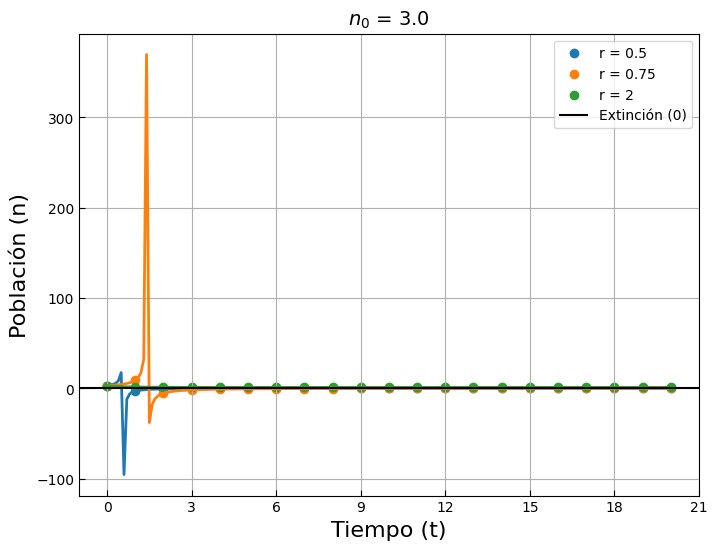

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Parámetros
rs = [0.5, 0.75, 2]  # Lista de diferentes valores de r
K = 1.0  # Capacidad de acarreo
time = 20  # Número de generaciones a simular
n0 = 3.0  # Población inicial

# Configuración de la gráfica
plt.figure(figsize=(8, 6))

# Simulación del mapeo de Beverton-Holt para diferentes valores de r
for r in rs:
    n = np.zeros(time + 1)
    n[0] = n0

    # Simulación del mapeo
    for t in range(time):
        n[t + 1] = (r * n[t]) / (1 + (r - 1) * n[t] / K)
    # Graficar los resultados
    plt.scatter(range(time + 1), n, marker = "o", label=f'r = {r}')

    # Solución del mapeo de Beverton-Holt 
    t_sol = np.arange(0,time,0.1)
    plt.plot(t_sol, K*n0/(n0+((K-n0)*(r**(-t_sol)))), linewidth=2)

#plt.axhline(y=K, color='k', linestyle='--', label='Acarreo (K)')
plt.axhline(y=0, color='k', linestyle='-', label='Extinción (0)')
plt.xlabel('Tiempo (t)', fontsize=16)
plt.ylabel('Población (n)', fontsize=16)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # Asegurar que los ticks del eje y sean enteros
plt.tick_params(axis='both', which='both', direction='in', length=4)
plt.title(f'$n_0$ = {n0}', fontsize=14)
plt.grid(True)
plt.legend(loc='best')
plt.show()

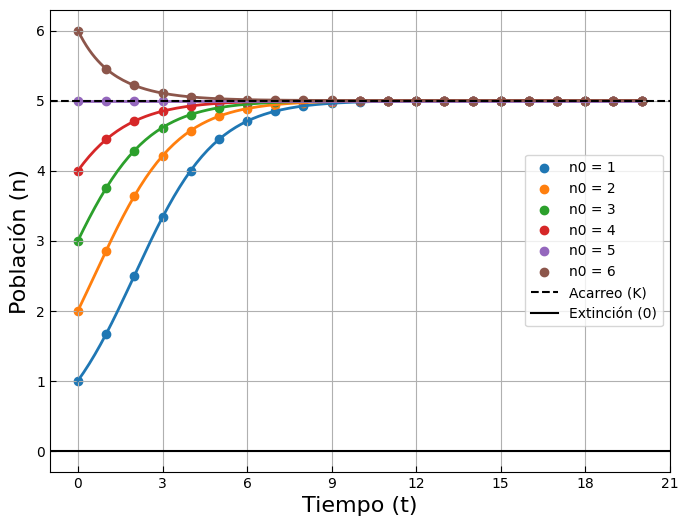

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
r = 2  # Fijar un valor de r
K = 5.0  # Capacidad de acarreo
time = 20  # Número de generaciones a simular
n0_values = [1, 2, 3, 4, 5, 6]  # Lista de diferentes valores iniciales de población

# Configuración de la gráfica
plt.figure(figsize=(8, 6))

# Simulación del mapeo de Beverton-Holt para diferentes valores iniciales de población n0
for n0 in n0_values:
    # Inicializar la lista de población con el valor inicial
    n = np.zeros(time + 1)
    n[0] = n0

    # Simulación del mapeo
    for t in range(time):
        n[t + 1] = (r * n[t]) / (1 + (r - 1) * n[t] / K)
    
    # Graficar los resultados
    plt.scatter(range(time + 1), n, marker='o', label=f'n0 = {n0}')
    
    # Solución del mapeo de Beverton-Holt 
    t_sol = np.arange(0,time,0.1)
    plt.plot(t_sol, K*n0/(n0+((K-n0)*(r**(-t_sol)))), linewidth=2)

# Configuración de la gráfica
plt.axhline(y=K, color='k', linestyle='--', label='Acarreo (K)')
plt.axhline(y=0, color='k', linestyle='-', label='Extinción (0)')
plt.xlabel('Tiempo (t)', fontsize=16)
plt.ylabel('Población (n)', fontsize=16)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # Asegurar que los ticks del eje y sean enteros
plt.tick_params(axis='both', which='both', direction='in', length=4)
#plt.title('Evolución de la población con el mapeo de Beverton-Holt para diferentes r', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()


# Ejercicio 2 
Considerar una ecuación logística con retraso
$$ \frac{dN}{dt} = rN(t) \biggr[ 1 - \frac{N (t - T)}{K} \biggr].$$ 

Resolver numéricamente el sistema, utilizando diversos valores de los parámetros y las condiciones iniciales. (Por ejemplo, $T = 1, K = 10, r = 0.3, 1.2$ y $2.0$, y con $N(t) = 2$, $T < t \leq 0$). Observar la existencia de los distintos regímenes: monótono, oscilatorio amortiguado y oscilatorio sostenido.

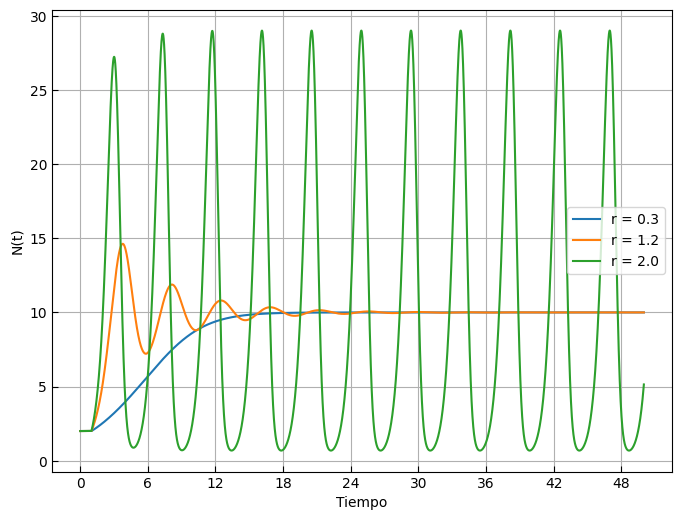

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Función que define la ecuación logística con retraso
def logistic_delay(t, N, T, K, r):
    return r * N[t] * (1 - N[t-T] / K)

# Función para resolver la ecuación logística con retraso numéricamente
def solve_logistic_delay(T, K, r, N0, t_max, dt):
    t_points = int(t_max / dt)
    N = np.zeros(t_points)
    time = np.linspace(0, t_max, t_points)
    
    # Condición inicial
    N[:int(T/dt)] = N0
    
    # Iteración para resolver la ecuación diferencial con retraso
    for t in range(int(T/dt), t_points):
        N[t] = N[t-1] + dt * logistic_delay(t-1, N, int(T/dt), K, r)
    
    return time, N

# Parámetros
T = 1
K = 10
N0 = 2
t_max = 50
dt = 0.001

# Diferentes valores de r
r_values = [0.3, 1.2, 2.0]

# Graficar resultados para diferentes valores de r
plt.figure(figsize=(8, 6))
for r in r_values:
    time, N = solve_logistic_delay(T, K, r, N0, t_max, dt)
    plt.plot(time, N, label=f'r = {r}')

plt.xlabel('Tiempo')
plt.ylabel('N(t)')
#plt.title('Solución numérica de la ecuación logística con retraso')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # Asegurar que los ticks del eje y sean enteros
plt.tick_params(axis='both', which='both', direction='in', length=4)
plt.legend()
plt.grid(True)
plt.show()

Verificar la validez de los resultados obtenidos analíticamente de manera aproximada:
$$ N(t) \approx 1 + c e^{\frac{\epsilon t}{1 + \pi^2/4}} e^{it \biggr[ 1 - \frac{\epsilon \pi}{2 (1 + \pi^2/4)}\biggr]}.$$

donde $T$ es un poco mayor que el valor crítico $T_c = \pi/2r$, $T = T_c + \epsilon$. Verificar que tanto la amplitud de las oscilaciones es independiente de la condición inicial, como que su período es independiente de $r$ y aproximadamente $4T$.

T =  1.2093048667653048
4T =  4.837219467061219


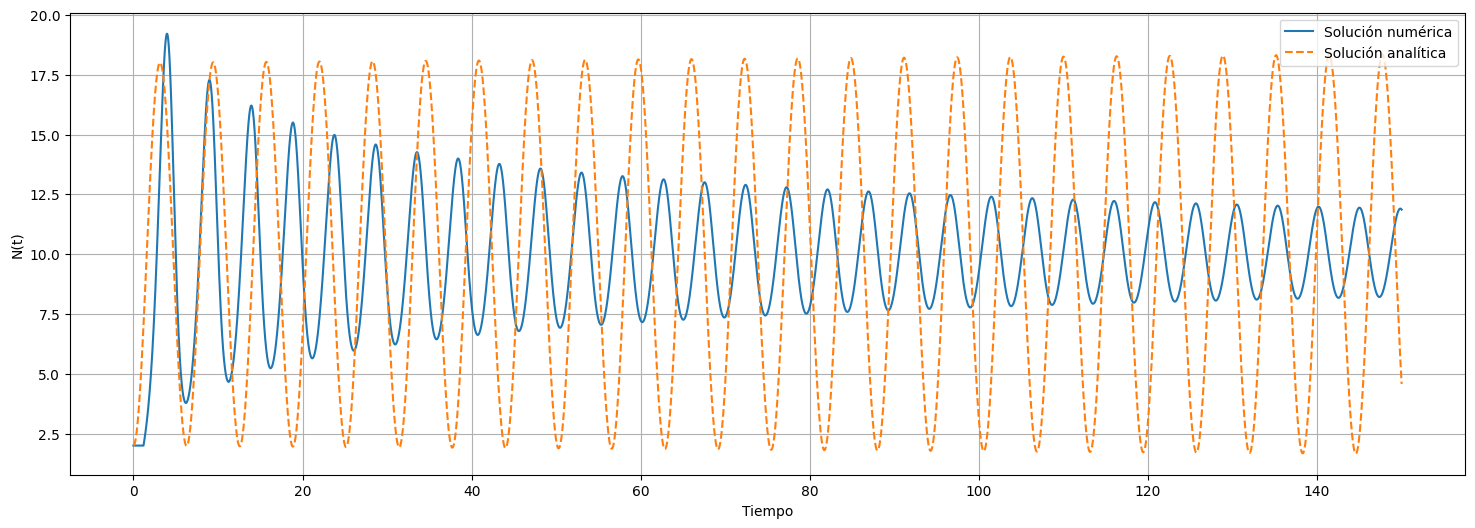

In [25]:
# Función que define la ecuación logística con retraso
def logistic_delay(t, N, T, K, r):
    return r * N[t] * (1 - N[t-T] / K)

# Función para resolver la ecuación logística con retraso numéricamente
def solve_logistic_delay(T, K, r, N0, t_max, dt):
    t_points = int(t_max / dt)
    N = np.zeros(t_points)
    time = np.linspace(0, t_max, t_points)
    
    # Condición inicial
    N[:int(T/dt)] = N0
    
    # Iteración para resolver la ecuación diferencial con retraso
    for t in range(int(T/dt), t_points):
        N[t] = N[t-1] + dt * logistic_delay(t-1, N, int(T/dt), K, r)
    
    return time, N

# Función para la solución analítica aproximada
def analytical_solution(t,  epsilon, c, K):
    term1 = c * np.exp((epsilon * t) / (1 + np.pi**2 / 4))
    term2 = np.cos(t * (1 - (epsilon * np.pi) / (2 * (1 + np.pi**2 / 4))))
    return K*(1 + np.real(term1 * term2))

# Parámetros
K = 10
N0 = 2
t_max = 150
dt = 0.01
c = -0.8  # Un pequeño valor arbitrario para c
eps = 0.001

# Diferentes valores de r
r_values = [1.3]

# Graficar resultados para diferentes valores de r
plt.figure(figsize=(18, 6))
for r in r_values:
    # Solución numérica
    T = (np.pi/(2*r))+eps
    print("T = ", T)
    print("4T = ", 4*T)
    time, N = solve_logistic_delay(T, K, r, N0, t_max, dt)
    plt.plot(time, N, label=f'Solución numérica')
    
    # Solución analítica aproximada
    N_analytical = analytical_solution(time, eps, c, K)
    plt.plot(time, N_analytical, '--', label=f'Solución analítica')

plt.xlabel('Tiempo')
plt.ylabel('N(t)')
#plt.title('Solución numérica y analítica de la ecuación logística con retraso')
plt.legend()
plt.grid(True)
plt.show()


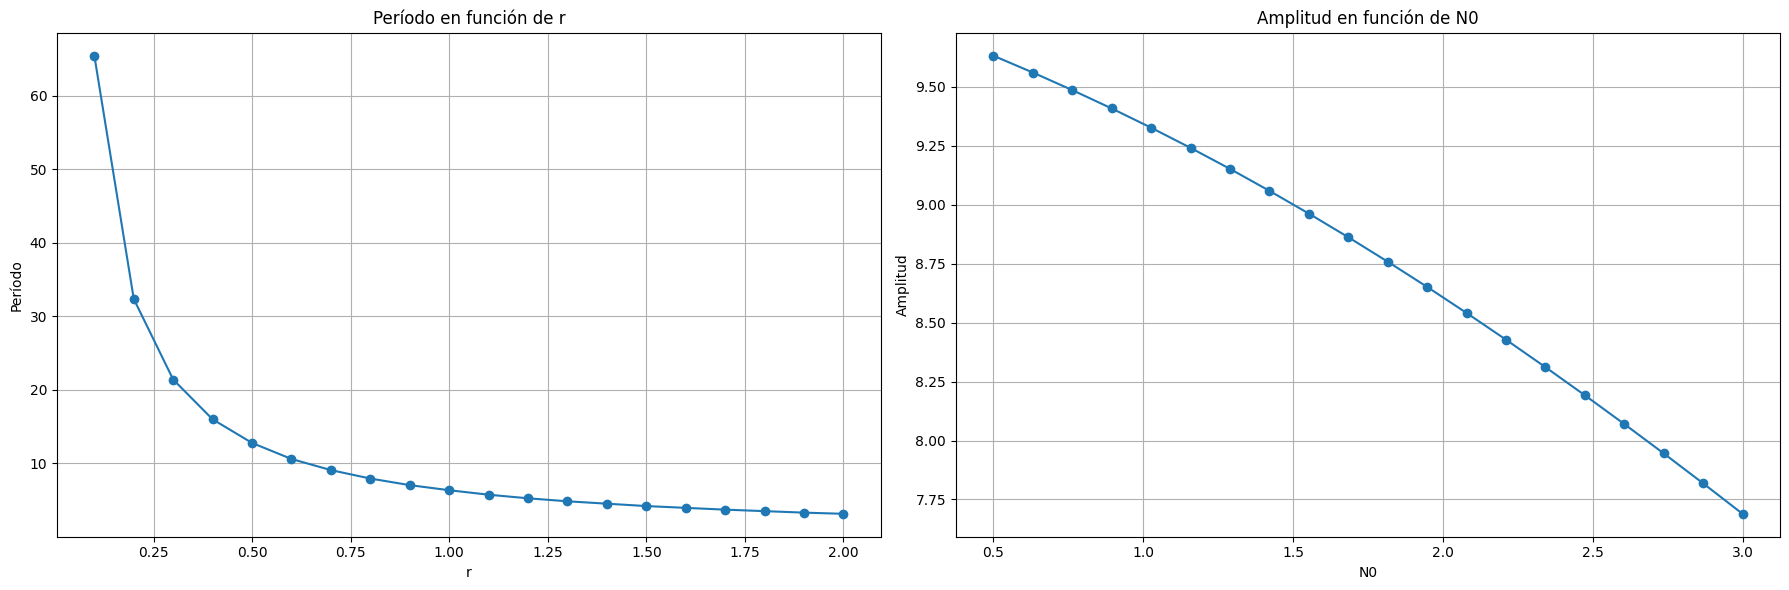

In [178]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_delay(t, N, T_dt, K, r):
    if t < T_dt:
        return r * N[t] * (1 - N[t] / K)
    else:
        return r * N[t] * (1 - N[t - T_dt] / K)

def solve_logistic_delay(T, K, r, N0, t_max, dt):
    t_points = int(t_max / dt)
    N = np.zeros(t_points)
    time = np.linspace(0, t_max, t_points)
    
    # Condición inicial
    N[:int(T/dt)] = N0
    
    # Iteración para resolver la ecuación diferencial con retraso
    for t in range(int(T/dt), t_points):
        N[t] = N[t-1] + dt * logistic_delay(t-1, N, int(T/dt), K, r)
    
    return time, N

def calculate_period(N, dt):
    peaks = np.where((N[1:-1] > N[:-2]) & (N[1:-1] > N[2:]))[0] + 1
    if len(peaks) > 1:
        periods = np.diff(peaks) * dt
        return np.mean(periods)
    else:
        return np.nan

def calculate_amplitude(N):
    return (np.max(N) - np.min(N)) / 2

# Parámetros
K = 10
t_max = 150
dt = 0.01
eps = 0.001

# Diferentes valores de r y N0
r_values = np.linspace(0.1, 2.0, 20)
N0_values = np.linspace(0.5, 3.0, 20)

# Arrays para almacenar los resultados
periods = []
amplitudes = []

# Calcular el período en función de r
N0 = 2
for r in r_values:
    T = (np.pi / (2 * r)) + eps
    time, N = solve_logistic_delay(T, K, r, N0, t_max, dt)
    period = calculate_period(N, dt)
    periods.append(period)

# Calcular la amplitud en función de N0
r = 1.3
T = (np.pi / (2 * r)) + eps
for N0 in N0_values:
    time, N = solve_logistic_delay(T, K, r, N0, t_max, dt)
    amplitude = calculate_amplitude(N)
    amplitudes.append(amplitude)

# Graficar los resultados
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(r_values, periods, marker='o')
plt.xlabel('r')
plt.ylabel('Período')
plt.title('Período en función de r')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(N0_values, amplitudes, marker='o')
plt.xlabel('N0')
plt.ylabel('Amplitud')
plt.title('Amplitud en función de N0')
plt.grid(True)

plt.tight_layout()
plt.show()

# Ejercicio 3 
En el modelo matricial de Leslie se llega a una expresión final que se interpreta como el hecho de que si una hembra deja en promedio menos de 1 descendiente en su vida, la especie se extingue, si deja 1 la especie mantiene la población y si es mayor a 1 la población crece exponencialmente. Matemáticamente corresponde a mostrar que el coeficiente asociado al crecimiento $r_1$ puede ser menor, igual o mayor a 1. Estas dos condiciones se vinculan a través de la expresión vista en clase 
$$ R = 1 - (f_0 + s_0f_1 + s_0s_1f_2 + ... + s_0s_1 ... s_{K1}). $$
Mostrar que la $r_1$ ser mayor que 1 si y solo si $R < 0$.

# Ejercicio 4 

Dada una especie con ciclo de vida anual, por ejemplo un insecto, en la que cada individuo produce $r$ descendientes y luego muere. La población evoluciona de acuerdo a:
$$ N_{t+1} = r N_t. $$
Simular el sistema, suponiendo que $r$ obedece a una distribución de Poisson con media 1.7, comenzando con un solo individuo, y observar lo que pasa.

[3, 2, 3, 2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 3, 2, 2, 0, 3, 3, 1]


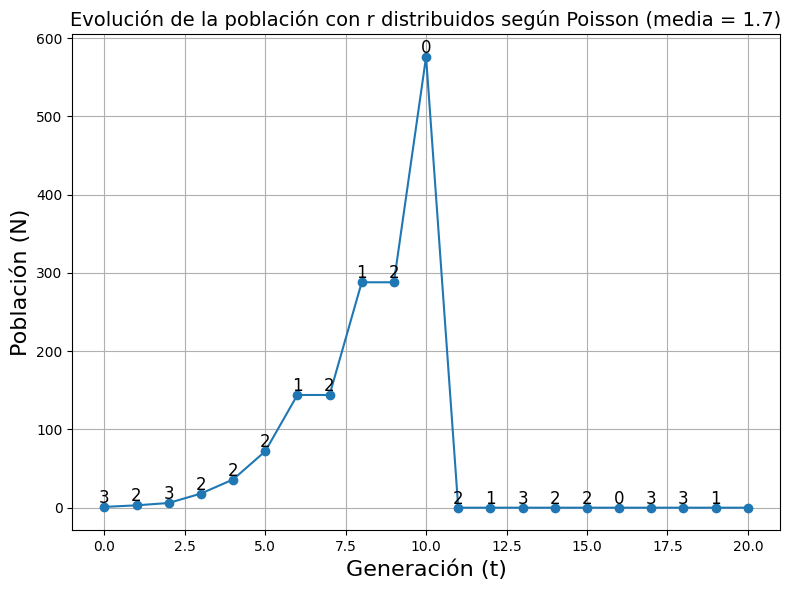

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
mean_r = 1.7  # Media de la distribución de Poisson para r
generations = 20  # Número de generaciones a simular
N0 = 1  # Número inicial de individuos

# Inicializar la lista de población con el valor inicial
N = [N0]
rs = []

# Simulación del sistema
for t in range(generations):
    r = np.random.poisson(mean_r)  # Generar r de una distribución de Poisson
    rs.append(r)
    N.append(r * N[-1]) # Calcular N_{t+1}

print(rs)

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.plot(range(generations + 1), N, marker='o', linestyle='-')

# Añadir texto de r en cada punto
for i in range(generations):
    plt.text(i, N[i], f'{rs[i]}', fontsize=12, ha='center', va='bottom')

plt.xlabel('Generación (t)', fontsize=16)
plt.ylabel('Población (N)', fontsize=16)
plt.title('Evolución de la población con r distribuidos según Poisson (media = 1.7)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
# Parámetros
mean_r = 1.7  # Media de la distribución de Poisson para r
generations = 10000000 # Número de generaciones a simular
N0 = 1  # Número inicial de individuos
repetitions = 1000000  # Número de repeticiones del sistema

# Arrays para almacenar los resultados
max_population = np.zeros(repetitions)
extinction_time = np.zeros(repetitions)

# Simulación de las repeticiones del sistema
for i in range(repetitions):
    N = [N0]
    for t in range(generations):
        r = np.random.poisson(mean_r)  # Generar r de una distribución de Poisson
        N.append(r * N[-1]) # Calcular N_{t+1}
        if N[-1] == 0:
            break
    max_population[i] = np.max(N)
    extinction_time[i] = t

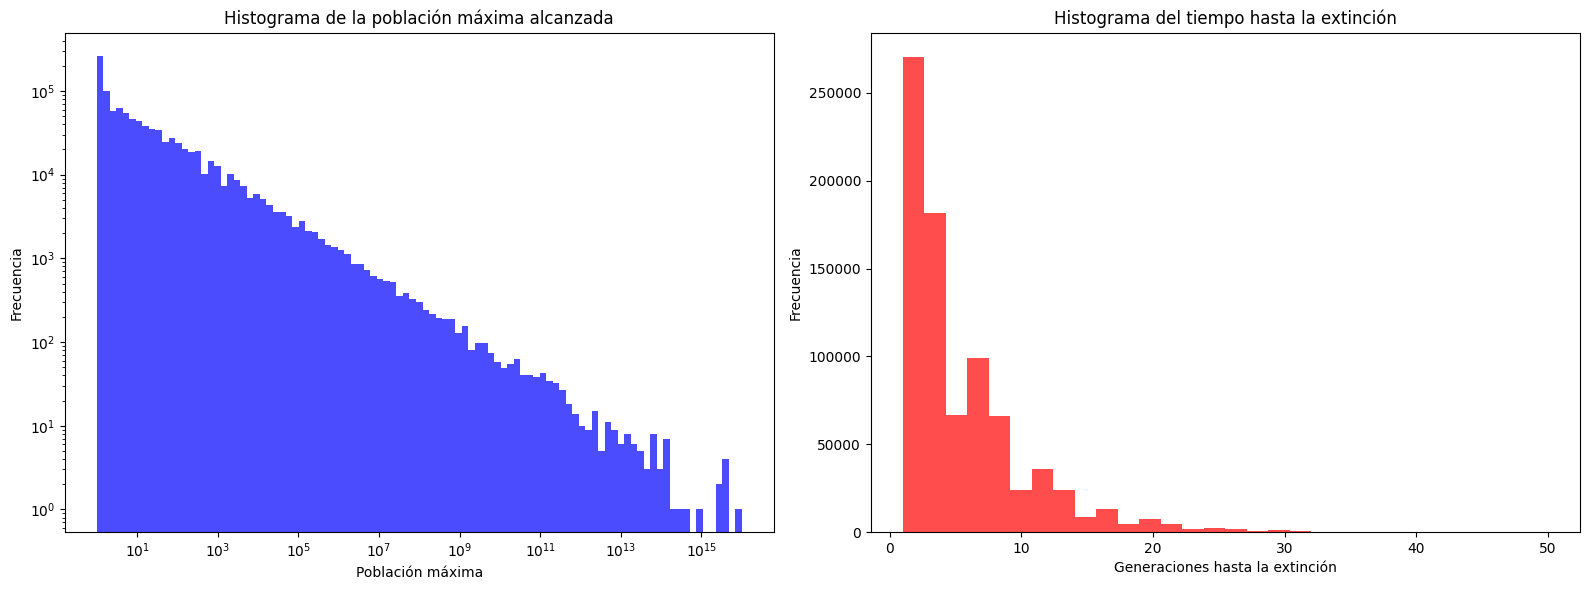

In [58]:
# Graficar histogramas en dos subplots
bin=np.logspace(np.log10(1), np.log10(1e16), num=100)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.hist(max_population, bins=bin, color='b', alpha=0.7)
plt.xlabel('Población máxima')
plt.ylabel('Frecuencia')
plt.xscale('log')
plt.yscale('log')
plt.title('Histograma de la población máxima alcanzada')

plt.subplot(1, 2, 2)
plt.hist(extinction_time, bins=30, range=(1, 50), color='r', alpha=0.7)
plt.xlabel('Generaciones hasta la extinción')
plt.ylabel('Frecuencia')
plt.title('Histograma del tiempo hasta la extinción')

plt.tight_layout()
plt.show()

# Ejercicio 5
Considerar una población de animales costeros, que viven entre las líneas de mareas alta y baja "intertidal". Estas poblaciones son particularmente vulnerables al efecto de tormentas severas, que las afectan de distinto modo según su intensidad y el estado de la marea. Supongamos que puede modelar el sistema mediante una evolución determinista entre eventos desastrosos que ocurren al azar:

(a) Crecimiento logístico entre desastres: $ \cdot{N} = rN(1 - N/K)$.

(b) Si ocurre un desastre a tiempo $t$, inmediatamente la población se ve reducida en una fracción $p$: $N(t^+) = pN(t)$.

(c) Los tiempos entre desastres siguen una distribución exponencial con media $1/\lambda$ (es decir la ocurrencia de desastres es un proceso de Poisson, con tasa $\lambda$).

Analizar el comportamiento del sistema y encontrar una condición que caracterice la posibilidad del sistema de recuperarse de un desastre.

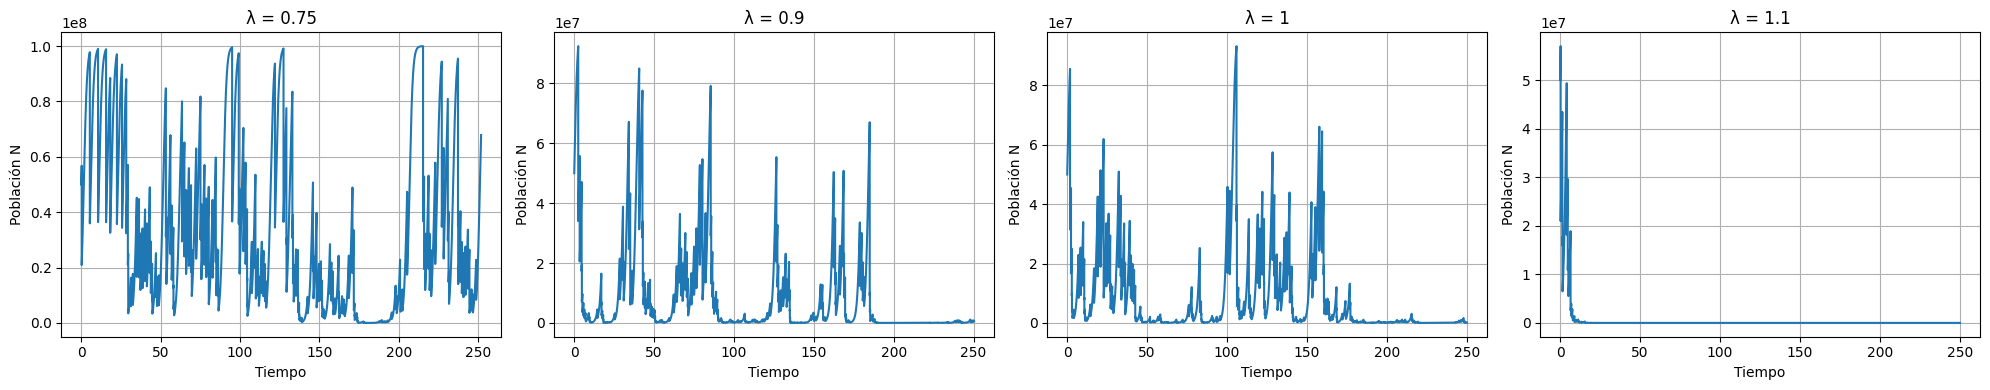

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definir la función logística
def logistic(N, t, r, K):
    return r * N * (1 - N/K)

# Parámetros
K = 1e8
t_max = 250
r = 1
p = np.e**-1
ls = [0.75, 0.9, 1, 1.1]

# Crear subplots
fig, axs = plt.subplots(1,len(ls), figsize=(20,4))

for i, l in enumerate(ls):
    t_current = 0
    N0 = K/2
    N = np.array([])
    ts = np.array([])
    while t_current < t_max:
        tiempos_entre_desastres = np.random.exponential(1/l)
        t = np.linspace(t_current, t_current + tiempos_entre_desastres, 1000)
        n = odeint(logistic, N0, t, args=(r, K))
        N = np.append(N, n)
        ts = np.append(ts, t)
        N0 = N[-1] * p
        t_current += tiempos_entre_desastres
    
    # Graficar en el subplot correspondiente
    axs[i].plot(ts, N)
    axs[i].set_title(f'λ = {l}')
    axs[i].set_xlabel('Tiempo')
    axs[i].set_ylabel('Población N')
    axs[i].grid(True)

# Ajustar el layout
plt.tight_layout()
plt.show()

In [74]:
print(np.e**(-1)*np.e**(r/1.1))

0.9131007162822623


# Ejerecicio 6 - Efecto Allee

El efecto Allee da cuenta de un fenómeno, descripto por W.C. Allee, asociado a la existencia de un número crítico mínimo de individuos para garantizar la supervivencia de la especie. Se supone que a partir de cierto umbral, el tamaño poblacional es tan reducido que los individuos no se reproducen al no encontrarse con otros individuos de la misma población. Una manera de modelar este efecto es por medio de la siguiente ecuación. 
$$\frac{dN}{dt} = rN \biggr[ 1 - \frac{N}{K} \biggr] \biggr[ \frac{N}{A} -1 \biggr]. $$
Analizar sus equilibrios y la estabilidad de los mismos. ¿Qué la hace diferente de la logística?

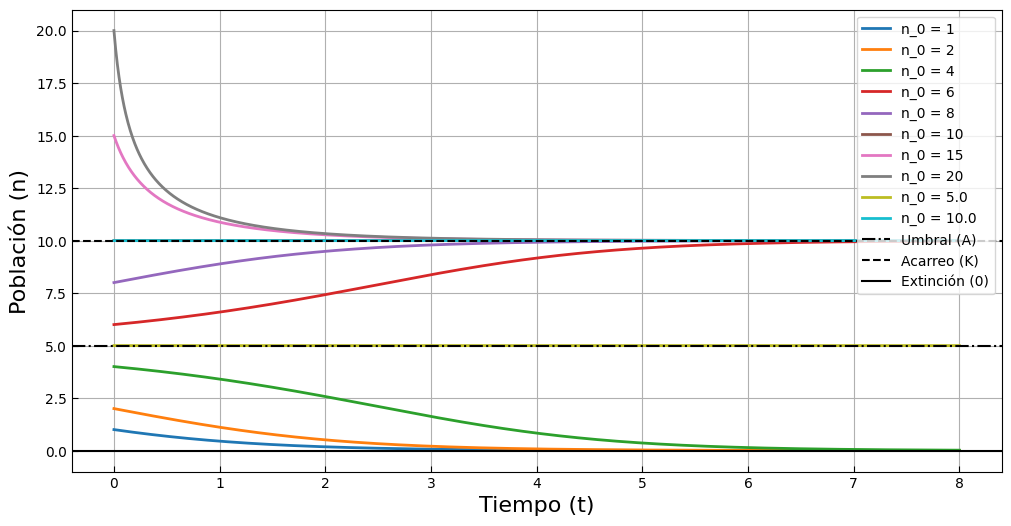

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.ticker import MaxNLocator

def allee(N,t,r,A,K):
    return r*N*(1-(N/K))*((N/A)-1)

# Parámetros
r=1
A=5.0
K=10.0
t_max=8.0

plt.figure(figsize=(12, 6))

n0_values = [1, 2, 4, 6, 8, 10, 15,20, A, K]  # Lista de diferentes valores iniciales de población n0
for n0 in n0_values:
    t = np.linspace(0,t_max,1500)
    N = odeint(allee, n0, t, args=(r,A,K))
    plt.plot(t, N, linewidth=2, label = f'n_0 = {n0}')

# Configuración de la gráfica
plt.axhline(y=A, color='k', linestyle='-.', label='Umbral (A)')
plt.axhline(y=K, color='k', linestyle='--', label='Acarreo (K)')
plt.axhline(y=0, color='k', linestyle='-', label='Extinción (0)')
plt.xlabel('Tiempo (t)', fontsize=16)
plt.ylabel('Población (n)', fontsize=16)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # Asegurar que los ticks del eje y sean enteros
plt.tick_params(axis='both', which='both', direction='in', length=4)
#plt.title('Evolución de la población con el mapeo de Beverton-Holt para diferentes r', fontsize=14)
plt.grid(True)
plt.legend(loc='upper right')
plt.show()